In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
recMetaInfo = pd.read_csv('inD-dataset-v1.0/data/30_recordingMeta.csv')
trackInfo = pd.read_csv('inD-dataset-v1.0/data/30_tracks.csv')
trackMetaInfo = pd.read_csv('inD-dataset-v1.0/data/30_tracksMeta.csv')

trackMetaInfo.head()


,recordingId,trackId,initialFrame,finalFrame,numFrames,width,length,class
0,30,0,0,164,165,1.95184,4.83186,car
1,30,1,0,25613,25614,2.07064,4.19739,car
2,30,2,0,25613,25614,2.23145,5.34932,car
3,30,3,0,25613,25614,2.11827,4.75119,car
4,30,4,0,25613,25614,2.07056,4.83091,car


In [31]:
def showAll(location):

    scale = 1
    start = 0
    end = 0
    picture = 0

    if location == 4:
        picture = '00'
        scale = 6.5
        start = 0
        end = 6
    elif location == 1:
        picture = '07'
        scale = 10.5
        start = 7
        end = 17
    elif location == 2:
        picture = '18'
        scale = 10.5
        start = 18
        end = 29
    elif location == 3:
        picture = '30'
        scale = 10.3
        start = 30
        end = 32

        
    img = plt.imread('inD-dataset-v1.0/data/'+ picture + '_background.png')
    fig, ax = plt.subplots()
    
    for i in range(start, end+1):

        if i < 10:
            suff = '0' + str(i)
        else:
            suff = str(i)

        recMetaInfo = pd.read_csv('inD-dataset-v1.0/data/'+ suff + '_recordingMeta.csv')
        trackInfo = pd.read_csv('inD-dataset-v1.0/data/'+ suff + '_tracks.csv')
        trackMetaInfo = pd.read_csv('inD-dataset-v1.0/data/'+ suff + '_tracksMeta.csv')
        
        

        numTracks = recMetaInfo['numTracks'].loc[0]

        for j in range(0,numTracks): #drawing first 5 tracks
            track = trackInfo.loc[trackInfo['trackId'] == j]
            # print(track.iloc[0]['recordingId'])
            vehicle = trackMetaInfo.iloc[j]['class']
            col = 'blue'
            if(vehicle == 'truck_bus'):
                col = 'red'
            elif(vehicle == 'bicycle'):
                col = 'green'
            elif(vehicle == 'pedestrian'):
                col = 'yellow'
            ax.plot(scale*(track['xCenter']), -scale*(track['yCenter']), color=col, linewidth=1.0)

    ax.imshow(img)

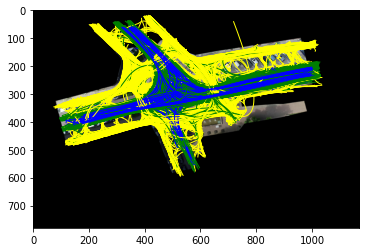

In [33]:
showAll(2)